# Stereo 

A script for implementing stereo algorithms 1, 2, and 3 from the lecture slides

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np
from tqdm import tqdm

In [2]:
# RGB to gray
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [84]:
def stereo1(img1, img2, dispRange):
    # Load in both images, assumed to be RGBA 8bit per channel images    
    h, w = img1.shape  # assume that both images are same size   
    
    left = img1.copy()
    right = img2.copy()
    
    # Depth (or disparity) map
    dispMap = np.zeros((h, w), np.int8)
      
    for y in range(h):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(w):
            best_offset = 0
            prev_d = None
            
            for offset in range(-dispRange, dispRange+1):               
                maxc = max(0, x + offset)
                maxc = min(maxc, w-1)
                
                d = abs(int(left[y, x]) - int(right[y, maxc]))              
                            
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if prev_d == None or d < prev_d:
                    prev_d = d
                    best_offset = abs(offset)
                            
            # set depth output for this x,y location to the best match
            dispMap[y, x] = best_offset
                                
    return dispMap

In [65]:
def map_value(img):
    #print(np.min(img))
    return (((img - np.min(img)) / (np.max(img) - np.min(img))) * 255).astype(np.uint8)

def metric_SSD(block_l, block_r):
    return np.sum(np.square(block_l - block_r))


def stereo2(img1, img2, dispRange, windowSize):
    pad_size = windowSize // 2
    img_left = np.pad(img1, ((pad_size, pad_size), (pad_size, pad_size)), 'constant', constant_values=((0, 0), (0, 0)))
    img_right = np.pad(img2, ((pad_size, pad_size), (pad_size, pad_size)), 'constant', constant_values=((0, 0), (0, 0)))
    result = np.empty([img1.shape[0], img1.shape[1]])
    print(img_left.shape, img_right.shape)
    for i in range(0, img1.shape[0]):
        print(".", end="", flush=True)
        for j in range(0, img1.shape[1]):
            # print "j: ", j
            filter = img_left[i:i+windowSize, j:j+windowSize]
            start = np.amax([0, j-dispRange])
            best_SSD = 99999999
            best_x = start
            end = np.amin([img1.shape[1], j+dispRange])
            # end = np.amin([img_l.shape[1], start+range_size*2])
            #
            # print "start: ", start
            # print "end: ", end
            # filter_result = np.empty(end-start)
            for k in range(start, end):
                SSD = metric_SSD(filter, img_right[i:i + windowSize, k:k + windowSize])
                if SSD < best_SSD:
                    best_SSD = SSD
                    best_x = k
            result[i][j] = np.absolute(j - best_x)
            # print j, best_x, j - best_x, best_SSD

    return map_value(result)

In [7]:
def stereo3(img1, img2, dispRange, windowSize, lamda):
    raise NotImplementedError

### Experimental settings

In [21]:
f1 = "sawtooth/im2.jpg"
f2 = "sawtooth/im6.jpg"

img1 = rgb2gray(plt.imread(f1)).astype(np.uint8)
img2 = rgb2gray(plt.imread(f2)).astype(np.uint8)

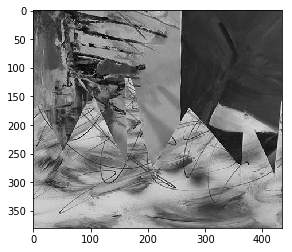

In [9]:
plt.imshow(img1, cmap='gray')

### Stereo 1

In [85]:
dispRange = 15

dispMap = stereo1(img1, img2, dispRange)

............................................................................................................................................................................................................................................................................................................................................................................................

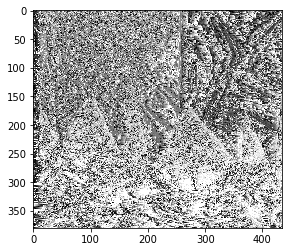

In [86]:
plt.imshow(dispMap, cmap='gray')

In [87]:
dispRange = 15

dispMap = stereo1(img2, img1, dispRange)

............................................................................................................................................................................................................................................................................................................................................................................................

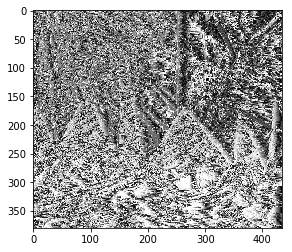

In [88]:
plt.imshow(dispMap, cmap='gray')

### Stereo 2

In [60]:
windowSize = 7
dispRange = 30

dispMap = stereo2(img1, img2, dispRange, windowSize)

(386, 440) (386, 440)
............................................................................................................................................................................................................................................................................................................................................................................................0.0


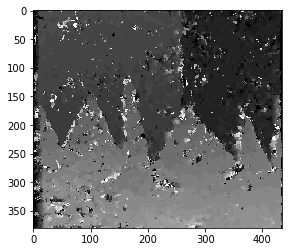

In [61]:
plt.imshow(dispMap, cmap='gray')

In [62]:
windowSize = 7
dispRange = 30

dispMap = stereo2(img1, img2, dispRange, windowSize)

(386, 440) (386, 440)
............................................................................................................................................................................................................................................................................................................................................................................................0.0


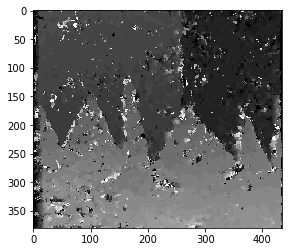

In [63]:
plt.imshow(dispMap, cmap='gray')